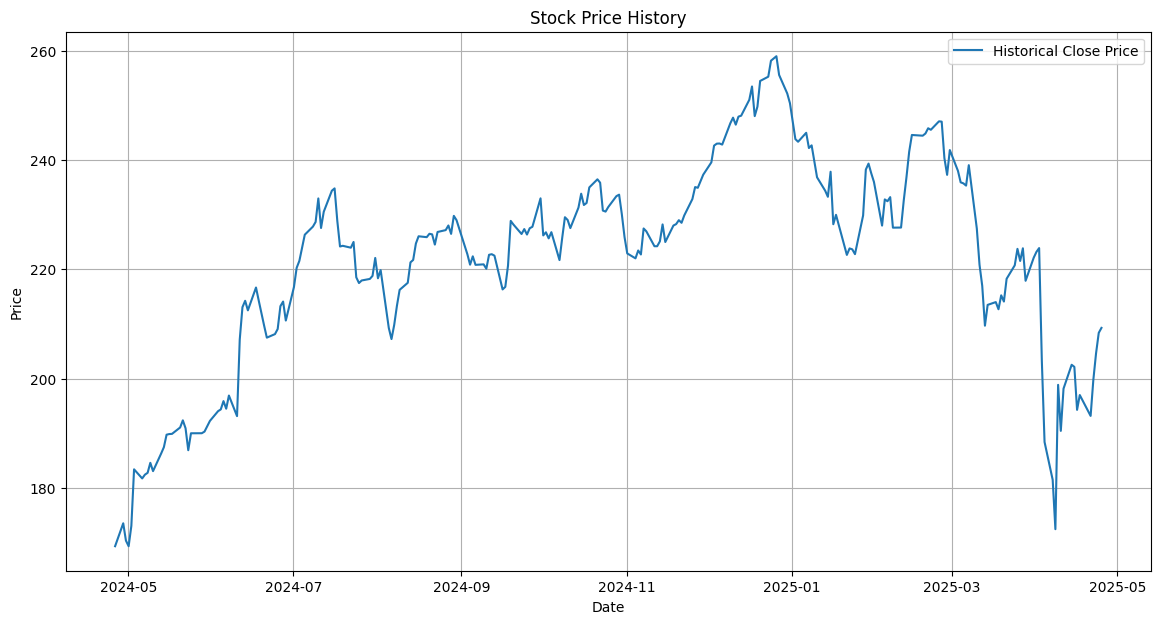

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: T-15, at position 0

In [1]:
# 1. Imports
import pandas as pd
import matplotlib.pyplot as plt
from pymongo import MongoClient
from dotenv import load_dotenv
import os

# 2. Load environment
load_dotenv()

# 3. Connect to Mongo
client = MongoClient(os.getenv("MONGO_URI"))
db = client["PeliCanStonks"]
collection_history = db["stonk_history"]
collection_forecast = db["technical_analysis"]

# 4. Load the latest history
latest_history = collection_history.find().sort("timestamp", -1).limit(1)[0]["forecast"]
history_df = pd.DataFrame(latest_history)

# 5. Load the latest forecast
latest_forecast = collection_forecast.find().sort("timestamp", -1).limit(1)[0]["forecast"]

# 6. Plot historical stock prices
plt.figure(figsize=(14, 7))
plt.plot(pd.to_datetime(history_df["timestamp"]), history_df["close"], label="Historical Close Price")
plt.title("Stock Price History")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

# 7. (optional) Plot detected patterns on top
for pattern in latest_forecast["detected_patterns"]:
    for point in pattern["supporting_points"]:
        day = point["day"]
        price = point["price"]
        plt.scatter(pd.to_datetime(day), price, label=pattern["pattern_name"], marker="x", color="red")

plt.plot(pd.to_datetime(history_df["timestamp"]), history_df["close"], label="Historical Close Price", color="blue")
plt.title("Stock Price with Detected Patterns")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()
